# (Over-)Analyzing my Swiggy and Zomato orders



This Ipython Notebook contains a rudimentary analysis of my Swiggy and Zomato orders. The data was curated by parsing all the email bill receipts sent by the two companies. The parsing and wrangling process are carried out in python and the code is available on my [github][Link to the project].
[Link to the project]: 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%config IPCompleter.greedy=True
%matplotlib inline

In [2]:
dfs = pd.read_csv('.\swiggy_basic_data.csv')
dfs.head()

,order_id,label,res_name,num_of_items,item_cost_total,other_costs_total,discount_total,bill_cost,datetime
0,45906995188,Swiggy,The Good Bowl,1,166.67,13.33,0.0,180.0,"Thu, 11 Jul 2019 13:26:37"
1,45843463422,Swiggy,Hari Super Sandwich,5,125.00,25.00,0.0,150.0,"Wed, 10 Jul 2019 19:47:45"
2,45758148883,Swiggy,Truffles,2,138.60,42.40,0.0,181.0,"Tue, 09 Jul 2019 20:05:50"
3,45556801932,Swiggy,Truffles,2,311.39,43.11,-29.5,325.0,"Sun, 07 Jul 2019 12:10:02"
4,45070454064,Swiggy,Truffles,2,152.89,43.11,0.0,196.0,"Mon, 01 Jul 2019 21:04:15"


In [3]:
dfz = pd.read_csv('.\zomato_basic_data.csv')
dfz.head()

,order_id,label,res_name,num_of_items,item_cost_total,other_costs_total,discount_total,bill_cost,datetime
0,1623350674,Zomato,Brundhavana Food Point,2,220.00,25.00,-86.00,159.00,"Sat, 29 Jun 2019 20:06:18"
1,1409530399,Zomato,The Good Bowl,2,390.71,39.28,-115.71,314.28,"Wed, 19 Jun 2019 12:30:17"
2,1110404778,Zomato,The Good Bowl,1,162.14,30.50,-62.86,129.78,"Fri, 14 Jun 2019 21:18:44"
3,1083769730,Zomato,Recipe,2,210.00,32.60,-80.00,162.60,"Thu, 13 Jun 2019 13:32:54"
4,1685044666,Zomato,The Good Bowl,1,167.14,27.86,-62.86,132.14,"Tue, 11 Jun 2019 14:02:53"


In [4]:
dfs.describe()

,order_id,num_of_items,item_cost_total,other_costs_total,discount_total,bill_cost
count,1.250000e+02,125.000000,125.000000,125.000000,125.00000,125.000000
mean,2.739531e+10,2.264000,264.134240,35.107840,-0.32208,298.920000
std,1.258261e+10,0.872002,134.864389,21.256187,2.63605,145.838709
min,1.167701e+09,1.000000,41.900000,0.000000,-29.50000,60.000000
25%,1.860415e+10,2.000000,157.140000,16.000000,-0.10000,195.000000
50%,2.873678e+10,2.000000,251.000000,35.000000,0.00000,285.000000
75%,3.703293e+10,3.000000,338.840000,50.350000,0.00000,381.000000
max,4.590700e+10,6.000000,630.000000,98.540000,0.00000,708.000000


In [5]:
dfz.describe()

,order_id,num_of_items,item_cost_total,other_costs_total,discount_total,bill_cost
count,1.070000e+02,107.000000,107.000000,107.000000,107.000000,107.000000
mean,1.249987e+09,2.121495,290.274206,32.113832,-45.639346,276.748692
std,4.351053e+08,0.761209,125.193371,16.932399,49.511726,127.224335
min,3.550310e+07,1.000000,100.000000,0.000000,-195.240000,90.000000
25%,1.159490e+09,2.000000,210.000000,18.125000,-85.000000,187.600000
50%,1.328699e+09,2.000000,240.000000,34.660000,-42.000000,238.000000
75%,1.538175e+09,3.000000,386.000000,41.880000,0.000000,339.025000
max,1.685045e+09,4.000000,730.000000,75.000000,0.000000,618.000000


In [6]:
df = pd.concat([dfs,dfz], ignore_index=True)
df.head()

,order_id,label,res_name,num_of_items,item_cost_total,other_costs_total,discount_total,bill_cost,datetime
0,45906995188,Swiggy,The Good Bowl,1,166.67,13.33,0.0,180.0,"Thu, 11 Jul 2019 13:26:37"
1,45843463422,Swiggy,Hari Super Sandwich,5,125.00,25.00,0.0,150.0,"Wed, 10 Jul 2019 19:47:45"
2,45758148883,Swiggy,Truffles,2,138.60,42.40,0.0,181.0,"Tue, 09 Jul 2019 20:05:50"
3,45556801932,Swiggy,Truffles,2,311.39,43.11,-29.5,325.0,"Sun, 07 Jul 2019 12:10:02"
4,45070454064,Swiggy,Truffles,2,152.89,43.11,0.0,196.0,"Mon, 01 Jul 2019 21:04:15"


In [7]:
df.describe()

,order_id,num_of_items,item_cost_total,other_costs_total,discount_total,bill_cost
count,2.320000e+02,232.000000,232.000000,232.000000,232.000000,232.000000
mean,1.533691e+10,2.198276,276.190172,33.726983,-21.222716,288.694440
std,1.598983e+10,0.824094,130.866791,19.399424,40.511138,137.721184
min,3.550310e+07,1.000000,41.900000,0.000000,-195.240000,60.000000
25%,1.283141e+09,2.000000,185.765000,16.100000,-30.750000,188.830000
50%,1.677116e+09,2.000000,242.900000,35.000000,0.000000,254.780000
75%,2.959452e+10,3.000000,358.200000,44.725000,0.000000,370.507500
max,4.590700e+10,6.000000,730.000000,98.540000,0.000000,708.000000


In [8]:
df[df['order_id'].duplicated()]

,order_id,label,res_name,num_of_items,item_cost_total,other_costs_total,discount_total,bill_cost,datetime


In [9]:
sns.set(
    style="whitegrid",
    font_scale=1.5,
)

## Top nth percentile Restaurants in terms of...

In [10]:
df_res_group_summed = df.groupby('res_name').sum()
# df_res_group_summed
df_res_group_mean = df.groupby('res_name').mean()
# df_res_group_mean
series_res_group_count = df.res_name.value_counts()
percentile_in_decimal = 0.8

### Total bill amount:

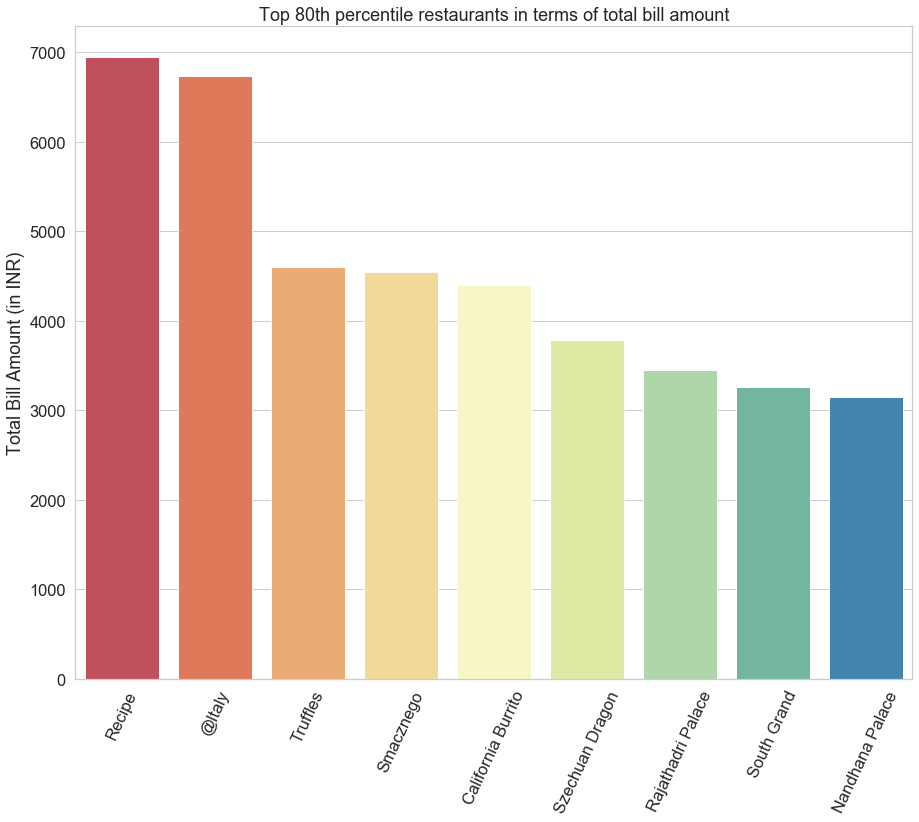

In [11]:
df_top_n_bill_cost = df_res_group_summed[df_res_group_summed.bill_cost > df_res_group_summed.bill_cost.quantile(percentile_in_decimal)]
df_top_n_bill_cost = df_top_n_bill_cost.sort_values(by='bill_cost', ascending=False)

f,ax = plt.subplots(figsize = (15,12))
chart = sns.barplot(
    x='res_name',
    y='bill_cost',
    data=df_top_n_bill_cost.reset_index(),
    palette='Spectral',
    dodge=False,
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=65)
chart.set(xlabel='', ylabel='Total Bill Amount (in INR)', title=f'Top {int(percentile_in_decimal * 100)}th percentile restaurants in terms of total bill amount')
pass

### Average bill amount:

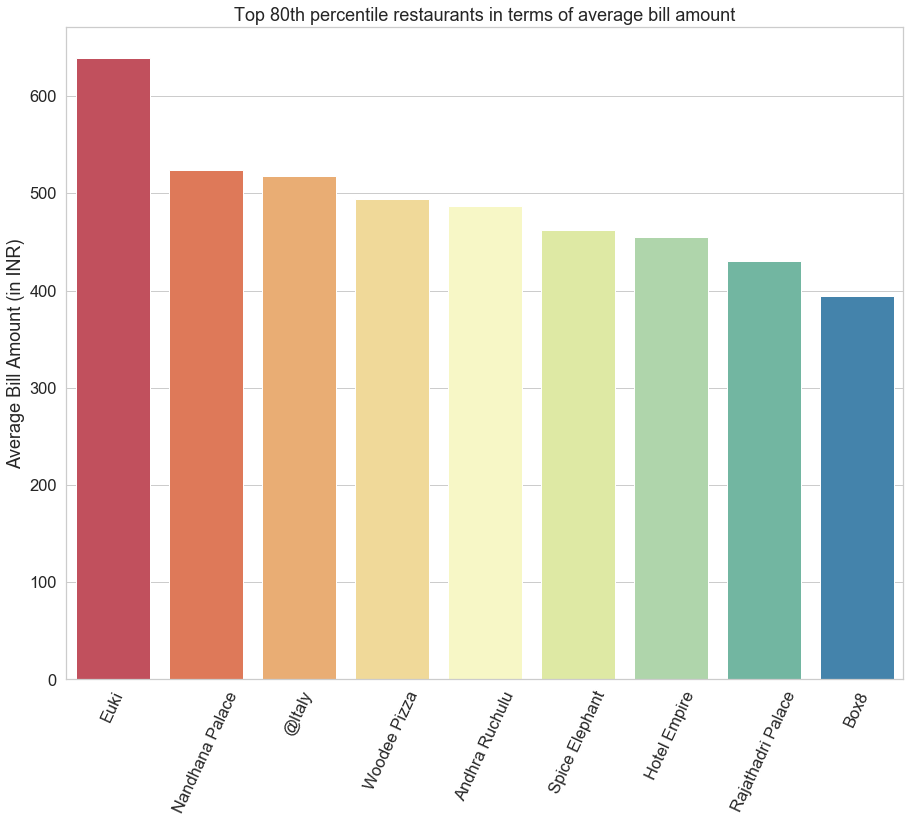

In [12]:
df_res_group_mean
df_top_n_avg_bill_cost = df_res_group_mean[df_res_group_mean.bill_cost > df_res_group_mean.bill_cost.quantile(percentile_in_decimal)]
df_top_n_avg_bill_cost = df_top_n_avg_bill_cost.sort_values(by='bill_cost', ascending=False)

f,ax = plt.subplots(figsize = (15,12))
chart = sns.barplot(
    x='res_name',
    y='bill_cost',
    data=df_top_n_avg_bill_cost.reset_index(),
    palette='Spectral',
    dodge=False,
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=65)
chart.set(xlabel='', ylabel='Average Bill Amount (in INR)', title=f'Top {int(percentile_in_decimal * 100)}th percentile restaurants in terms of average bill amount')
pass

### Number of orders:

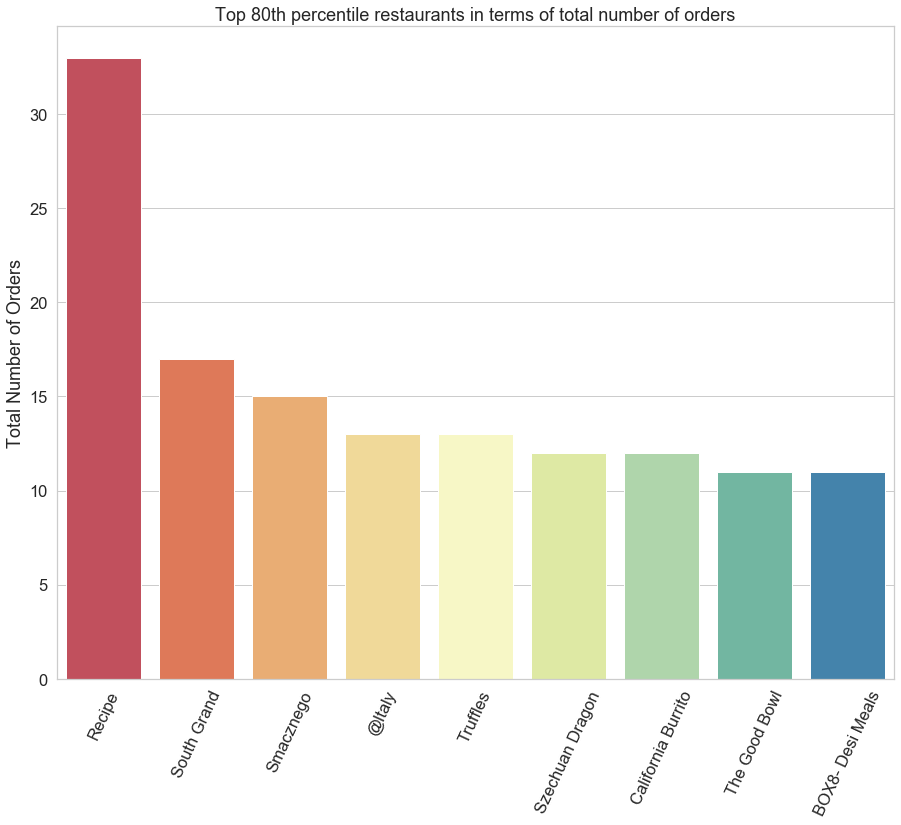

In [13]:
series_top_n_order_count = series_res_group_count[series_res_group_count > series_res_group_count.quantile(percentile_in_decimal)]
series_top_n_order_count = series_top_n_order_count.sort_values(ascending=False)

f, ax = plt.subplots(figsize=(15,12))

chart = sns.barplot(
    x=series_top_n_order_count.index,
    y=series_top_n_order_count.values,
    data=series_top_n_order_count.reset_index(),
    palette='Spectral',
    dodge=False,
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=65)
chart.set(xlabel='', ylabel='Total Number of Orders', title=f'Top {int(percentile_in_decimal * 100)}th percentile restaurants in terms of total number of orders')
pass

### Total number of items:

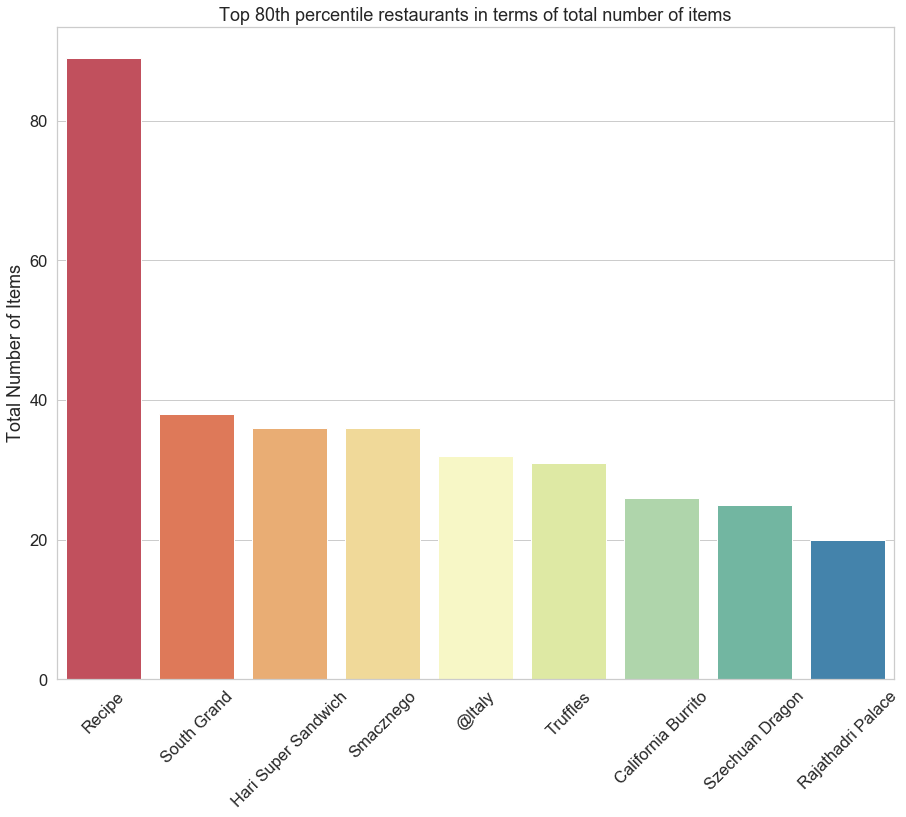

In [14]:
df_top_n_num_of_items = df_res_group_summed[df_res_group_summed.num_of_items > df_res_group_summed.num_of_items.quantile(percentile_in_decimal)]
df_top_n_num_of_items = df_top_n_num_of_items.sort_values(by='num_of_items', ascending=False)


f, ax = plt.subplots(figsize=(15,12))
chart = sns.barplot(
    x='res_name',
    y='num_of_items',
    data=df_top_n_num_of_items.reset_index(),
    palette='Spectral',
    dodge=False,
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set(xlabel='', ylabel='Total Number of Items', title=f'Top {int(percentile_in_decimal * 100)}th percentile restaurants in terms of total number of items')
pass


### Everything at once:

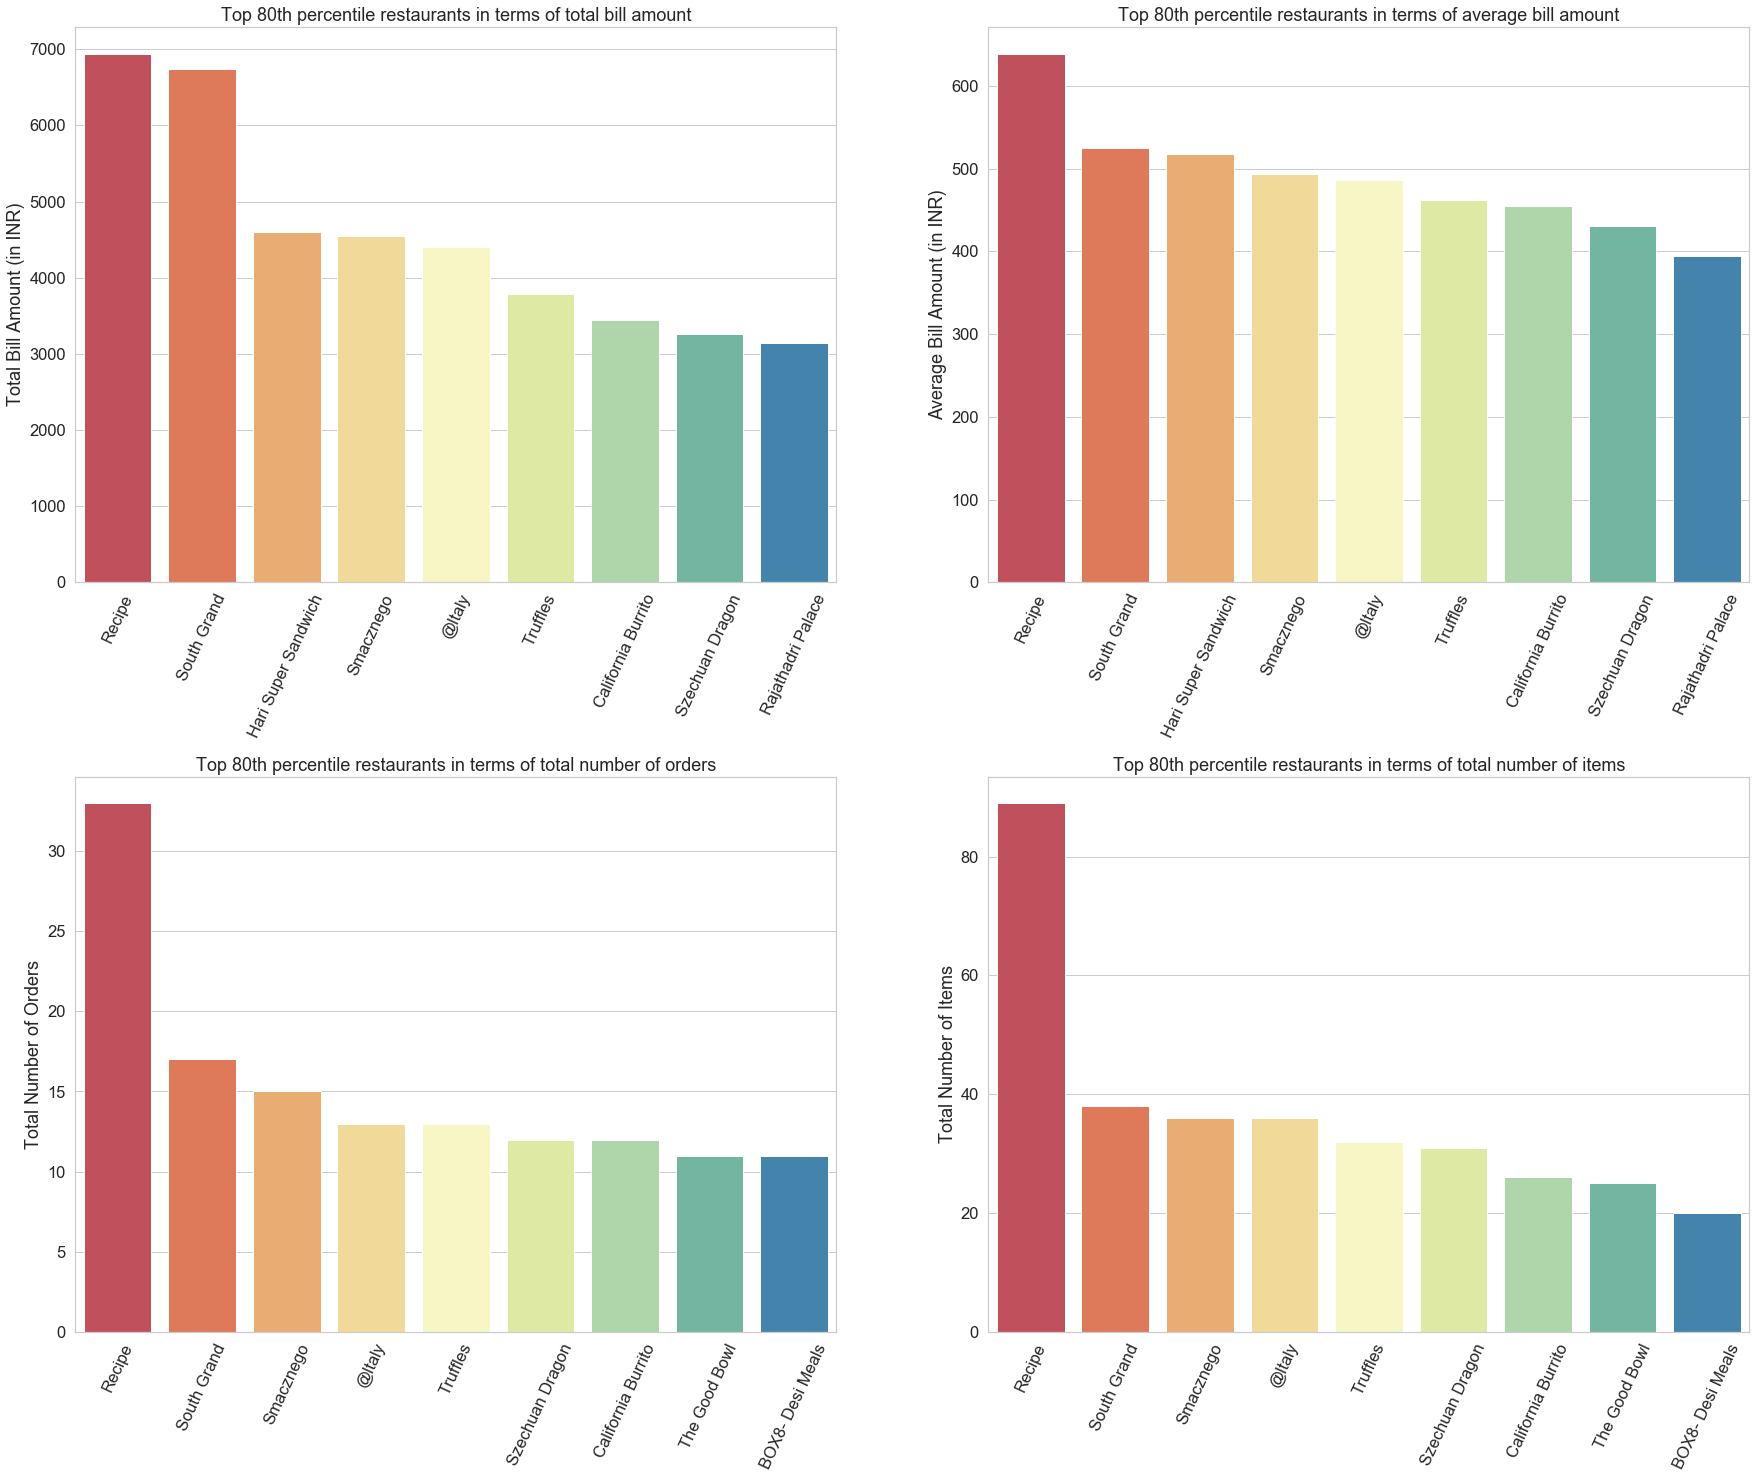

In [15]:
f, ax = plt.subplots(2, 2, figsize=(30,24))

plt.subplots_adjust(
#     left=None,
#     bottom=None,
#     right=None,
#     top=None,
#     wspace=None,
    hspace=0.35,
)

chart1 = sns.barplot(
    x=series_top_n_order_count.index,
    y=series_top_n_order_count.values,
    data=series_top_n_order_count.reset_index(),
    palette='Spectral',
    dodge=False,
    ax=ax[1][0],
)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=65)
chart1.set(xlabel='', ylabel='Total Number of Orders', title=f'Top {int(percentile_in_decimal * 100)}th percentile restaurants in terms of total number of orders')
pass


chart2 = sns.barplot(
    x='res_name',
    y='num_of_items',
    data=df_top_n_num_of_items.reset_index(),
    palette='Spectral',
    dodge=False,
    ax=ax[1][1],
)
chart2.set_xticklabels(chart1.get_xticklabels(), rotation=65)
chart2.set(xlabel='', ylabel='Total Number of Items', title=f'Top {int(percentile_in_decimal * 100)}th percentile restaurants in terms of total number of items')
pass


chart3 = sns.barplot(
    x='res_name',
    y='bill_cost',
    data=df_top_n_bill_cost.reset_index(),
    palette='Spectral',
    dodge=False,
    ax=ax[0][0],
)
chart3.set_xticklabels(chart.get_xticklabels(), rotation=65)
chart3.set(xlabel='', ylabel='Total Bill Amount (in INR)', title=f'Top {int(percentile_in_decimal * 100)}th percentile restaurants in terms of total bill amount')
pass

chart4 = sns.barplot(
    x='res_name',
    y='bill_cost',
    data=df_top_n_avg_bill_cost.reset_index(),
    palette='Spectral',
    dodge=False,
    ax=ax[0][1],
)
chart4.set_xticklabels(chart.get_xticklabels(), rotation=65)
chart4.set(xlabel='', ylabel='Average Bill Amount (in INR)', title=f'Top {int(percentile_in_decimal * 100)}th percentile restaurants in terms of average bill amount')
pass

### Average number of items per order

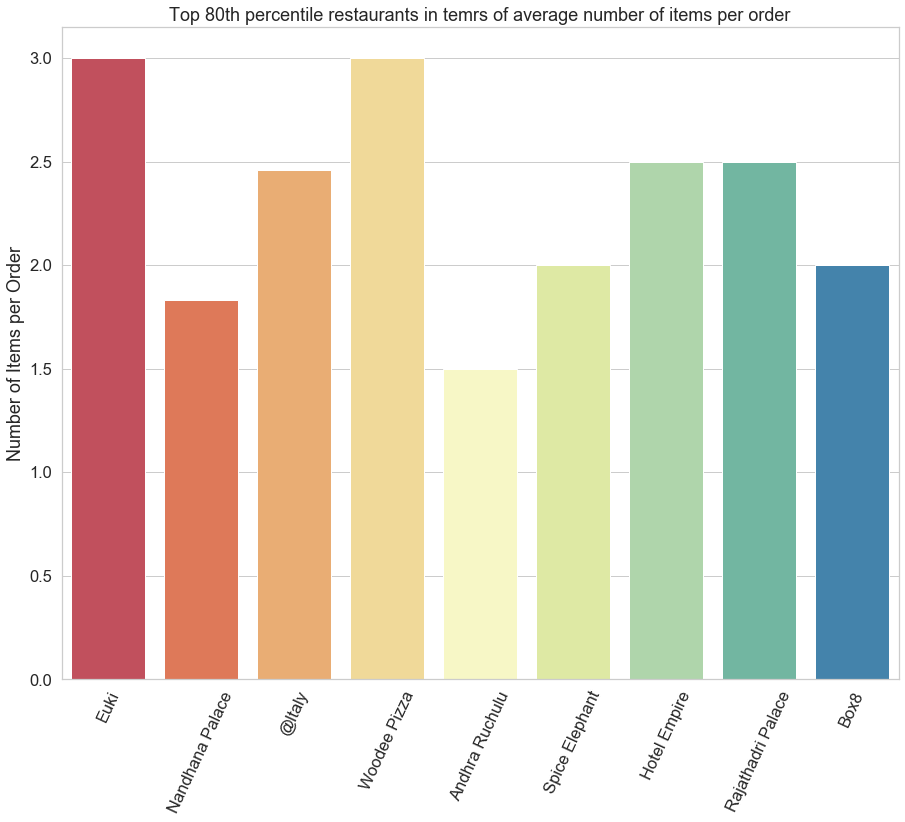

In [16]:
df_top_n_avg_items_per_order = df_res_group_mean[df_res_group_mean.bill_cost > df_res_group_mean.bill_cost.quantile(percentile_in_decimal)]
df_top_n_avg_items_per_order = df_top_n_avg_items_per_order.sort_values(by='bill_cost', ascending=False)

f, ax = plt.subplots(figsize=(15,12))
chart2 = sns.barplot(
    x='res_name',
    y='num_of_items',
    data=df_top_n_avg_items_per_order.reset_index(),
    palette='Spectral',
    dodge=False,
)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=65)
chart2.set(xlabel='', ylabel='Number of Items per Order', title=f'Top {int(percentile_in_decimal * 100)}th percentile restaurants in temrs of average number of items per order')
pass

## Analysis with datetime:

In [17]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index(df['datetime'])
df.shape

(232, 9)

### Rolling values:

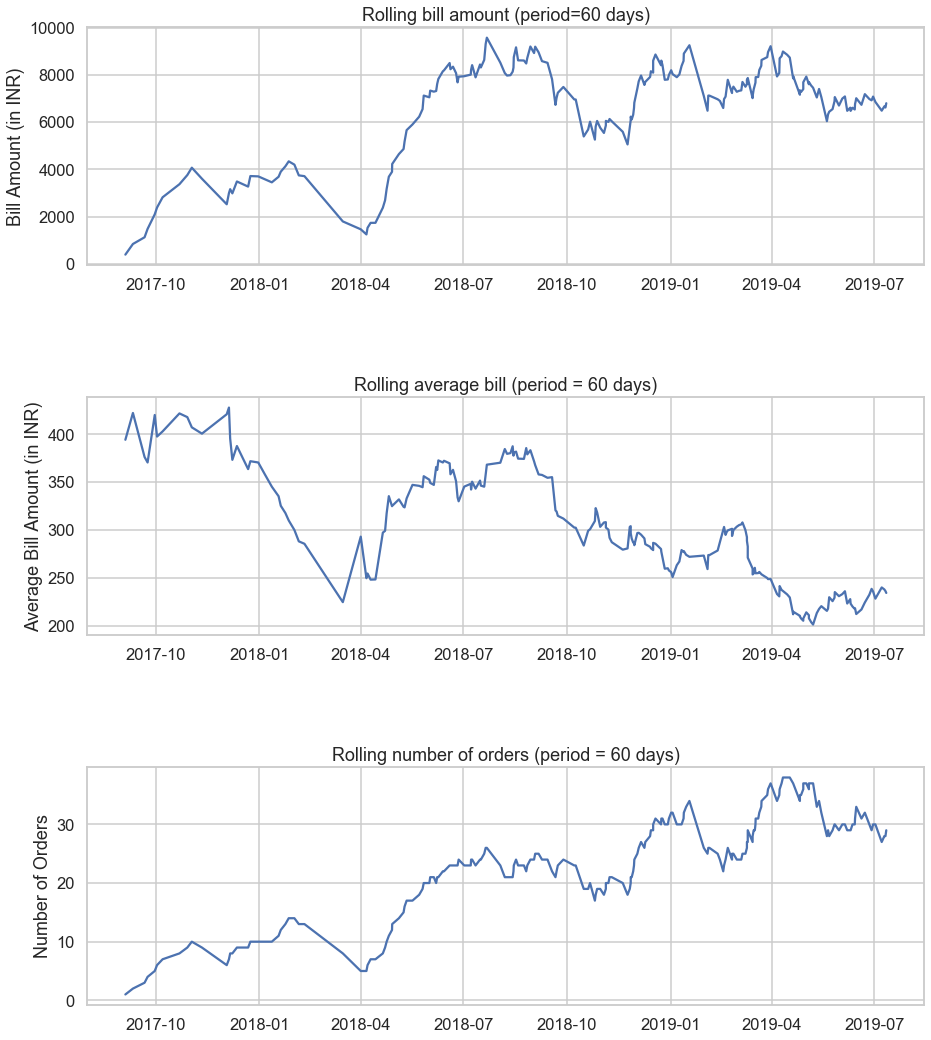

In [18]:
df = df.set_index(df.datetime)
df = df.sort_index(ascending=True)
rolling_period = '60d'


s_total_bill_cost_over_time = df['bill_cost'].rolling(rolling_period).sum()
s_avg_bill_cost_over_time = df['bill_cost'].rolling(rolling_period).mean()
s_num_of_orders_over_time = df['order_id'].rolling(rolling_period).count()

df['s_total_bill_cost_over_time'] = s_total_bill_cost_over_time
df['s_avg_bill_cost_over_time'] = s_avg_bill_cost_over_time
df['s_num_of_orders_over_time'] = s_num_of_orders_over_time

sns.set_context("talk")
palette = sns.color_palette("mako_r", 6)

f,ax = plt.subplots(3, 1,figsize = (15,18))
plt.subplots_adjust(
#     left=None,
#     bottom=None,
#     right=None,
#     top=None,
#     wspace=None,
    hspace=0.55,
)

chart1 = sns.lineplot(
    x = df.datetime,
    y = 's_total_bill_cost_over_time',
    data=df,
    ax=ax[0],
)
chart1.set(xlabel='', ylabel='Bill Amount (in INR)', title=f'Rolling bill amount (period={rolling_period.split("d")[0]} days)')
pass

# f,ax = plt.subplots(figsize = (15,12))
chart2 = sns.lineplot(
    x = df.datetime,
    y = 's_avg_bill_cost_over_time',
    data=df,
    ax=ax[1],
)
chart2.set(xlabel='', ylabel='Average Bill Amount (in INR)', title=f'Rolling average bill (period = {rolling_period.split("d")[0]} days)')
pass

# f,ax = plt.subplots(figsize = (15,12))
chart3 = sns.lineplot(
    x = df.datetime,
    y = 's_num_of_orders_over_time',
    data=df,
    ax=ax[2],
)
chart3.set(xlabel='', ylabel='Number of Orders', title=f'Rolling number of orders (period = {rolling_period.split("d")[0]} days)')
pass

### Cumulative count of total number of orders per restaurant over time:

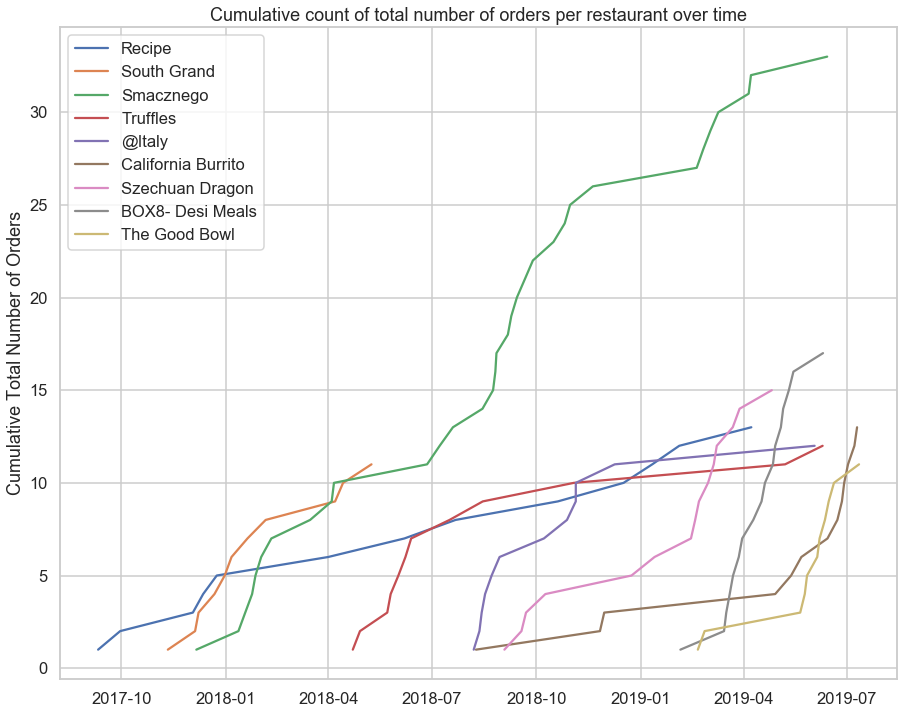

In [19]:
percentile_in_decimal = 0.8
df['cum_num_of_orders_per_res'] = df.groupby('res_name').cumcount() + 1
series_res_group_count = df.res_name.value_counts()

series_top_n_order_count = series_res_group_count[series_res_group_count > series_res_group_count.quantile(percentile_in_decimal)]
series_top_n_order_count = series_top_n_order_count.sort_values(ascending=False)
d_top_n_total_order_res_cumulative_count = df[df['res_name'].isin(series_top_n_order_count.index)]

sns.set_context("talk")
# palette = sns.color_palette("mako_r", 9)

f,ax = plt.subplots(figsize = (15,12))
chart = sns.lineplot(
    x = d_top_n_total_order_res_cumulative_count.datetime,
    y = 'cum_num_of_orders_per_res',
    hue='res_name',
    data=d_top_n_total_order_res_cumulative_count,
#     palette=palette
)
chart.set(xlabel='', ylabel='Cumulative Total Number of Orders', title=f'Cumulative count of total number of orders per restaurant over time')
pass
ax.legend(series_top_n_order_count.index, facecolor='w')

### Cumulative total bill amount and total number of orders per label over time:

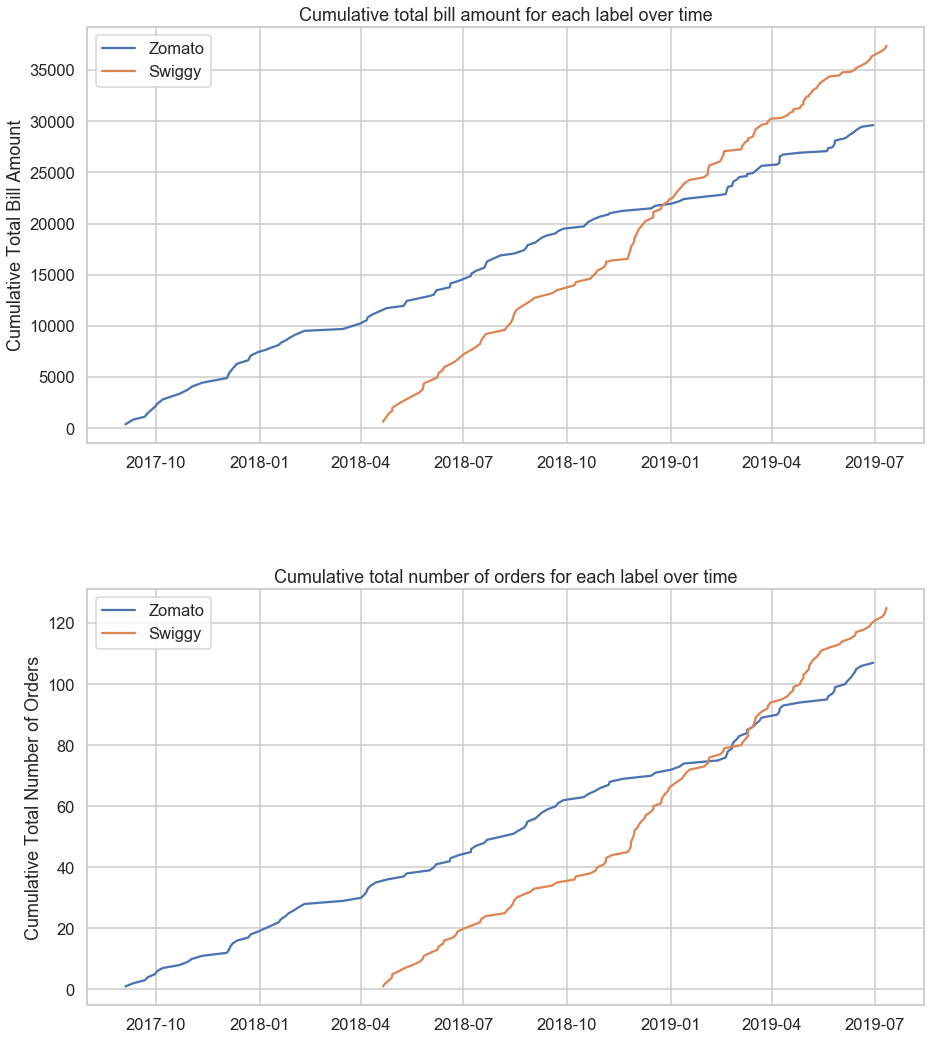

In [20]:
dfs.datetime = pd.to_datetime(dfs.datetime)
dfz.datetime = pd.to_datetime(dfz.datetime)
dfs = dfs.set_index(dfs.datetime)
dfs = dfs.sort_index(ascending=True)

dfz = dfz.set_index(dfz.datetime)
dfz = dfz.sort_index(ascending=True)
s_swiggy_cumulative_total_bill_over_time = dfs['bill_cost'].cumsum()
s_zomato_cumulative_total_bill_over_time = dfz['bill_cost'].cumsum()
df['s_swiggy_cumulative_total_bill_over_time'] = s_swiggy_cumulative_total_bill_over_time
df['s_zomato_cumulative_total_bill_over_time'] = s_zomato_cumulative_total_bill_over_time

df['cum_num_of_orders_per_label'] = df.groupby('label').cumcount() + 1

f,ax = plt.subplots(2, 1, figsize = (15,18))
plt.subplots_adjust(
#     left=None,
#     bottom=None,
#     right=None,
#     top=None,
#     wspace=None,
    hspace=0.35,
)
chart = sns.lineplot(
    x = df.datetime,
    y = 's_zomato_cumulative_total_bill_over_time',
    data=df,
    ax=ax[0],
)

sns.lineplot(
    x = df.datetime,
    y = 's_swiggy_cumulative_total_bill_over_time',
    data=df,
    ax=ax[0],
)
ax[0].legend(['Zomato', 'Swiggy'])
chart.set(xlabel='', ylabel='Cumulative Total Bill Amount', title=f'Cumulative total bill amount for each label over time')


chart = sns.lineplot(
    x = df.datetime,
    y = 'cum_num_of_orders_per_label',
    hue='label',
    data=df,
    ax=ax[1],
)

chart.set(xlabel='', ylabel='Cumulative Total Number of Orders', title=f'Cumulative total number of orders for each label over time')
ax[1].legend(['Zomato', 'Swiggy'])

## Violin plots

In [21]:
df.describe()

,order_id,num_of_items,item_cost_total,other_costs_total,discount_total,bill_cost,s_total_bill_cost_over_time,s_avg_bill_cost_over_time,s_num_of_orders_over_time,cum_num_of_orders_per_res,s_swiggy_cumulative_total_bill_over_time,s_zomato_cumulative_total_bill_over_time,cum_num_of_orders_per_label
count,2.320000e+02,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,125.000000,107.000000,232.000000
mean,1.533691e+10,2.198276,276.190172,33.726983,-21.222716,288.694440,6642.643319,298.762361,23.344828,6.762931,20900.160000,16609.523458,58.849138
std,1.598983e+10,0.824094,130.866791,19.399424,40.511138,137.721184,2026.783561,57.399567,8.643095,6.604459,10692.939866,8440.180035,34.156358
min,3.550310e+07,1.000000,41.900000,0.000000,-195.240000,60.000000,394.120000,201.451622,1.000000,1.000000,639.000000,394.120000,1.000000
25%,1.283141e+09,2.000000,185.765000,16.100000,-30.750000,188.830000,6028.857500,253.737353,19.750000,2.000000,12444.000000,9406.560000,29.750000
50%,1.677116e+09,2.000000,242.900000,35.000000,0.000000,254.780000,7170.285000,295.922804,24.000000,5.000000,21774.000000,17643.900000,58.500000
75%,2.959452e+10,3.000000,358.200000,44.725000,0.000000,370.507500,7997.250000,347.060504,30.000000,9.000000,30233.000000,23952.535000,87.250000
max,4.590700e+10,6.000000,730.000000,98.540000,0.000000,708.000000,9571.580000,427.674286,38.000000,33.000000,37365.000000,29612.110000,125.000000


### Bill Amount and Number of Items:

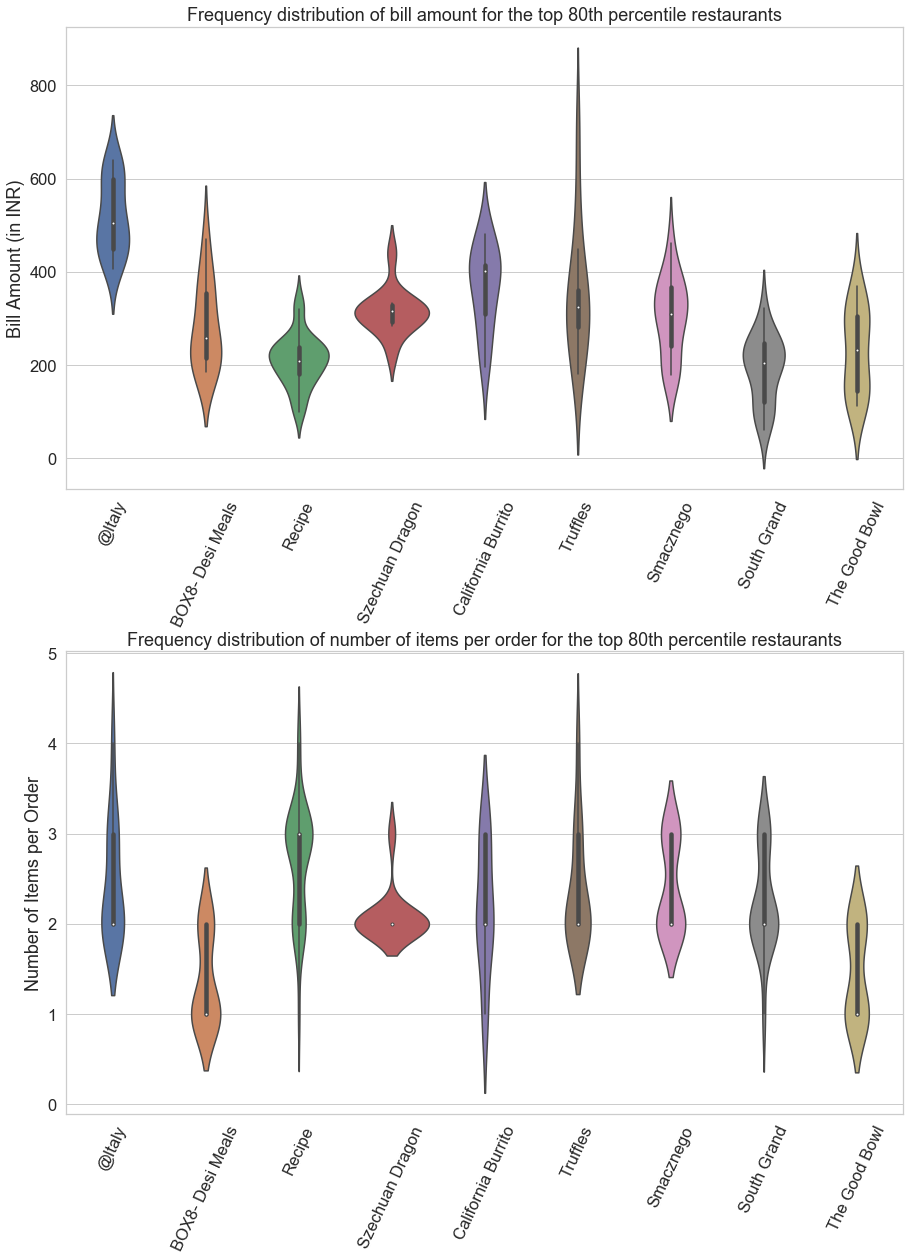

In [22]:
percentile_in_decimal = 0.8
df['cum_num_of_orders_per_res'] = df.groupby('res_name').cumcount() + 1
series_res_group_count = df.res_name.value_counts()

series_top_n_order_count = series_res_group_count[series_res_group_count > series_res_group_count.quantile(percentile_in_decimal)]
series_top_n_order_count = series_top_n_order_count.sort_values(ascending=False)
d_top_n_total_order_res_cumulative_count = df[df['res_name'].isin(series_top_n_order_count.index)]

sns.set()
sns.set(
    style="whitegrid",
    font_scale=1.5,
)

f,ax = plt.subplots(2, 1, figsize = (15,20))
plt.subplots_adjust(
    hspace=0.35,
)
chart = sns.violinplot(
    x=d_top_n_total_order_res_cumulative_count.res_name,
    y='bill_cost',
    data=d_top_n_total_order_res_cumulative_count,
    ax=ax[0],
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=65)
chart.set(xlabel='', ylabel='Bill Amount (in INR)', title=f'Frequency distribution of bill amount for the top {int(percentile_in_decimal * 100)}th percentile restaurants')
pass

chart = sns.violinplot(
    x=d_top_n_total_order_res_cumulative_count.res_name,
    y='num_of_items',
    data=d_top_n_total_order_res_cumulative_count,
    ax=ax[1],
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=65)
chart.set(xlabel='', ylabel='Number of Items per Order', title=f'Frequency distribution of number of items per order for the top {int(percentile_in_decimal * 100)}th percentile restaurants')
pass
